<a href="https://colab.research.google.com/github/sonG1031/ML_DL_STUDY/blob/main/k%ED%8F%89%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-평균
- 군집 알고리즘
- 작동 방식
    >
    1. 무작위로 k개의 클러스터 중심을 정한다.  
    1. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정   
    1. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.  
    1. 클러스터의 중심에 변화가 없을 때까지 2번으로 돌아가 반복  

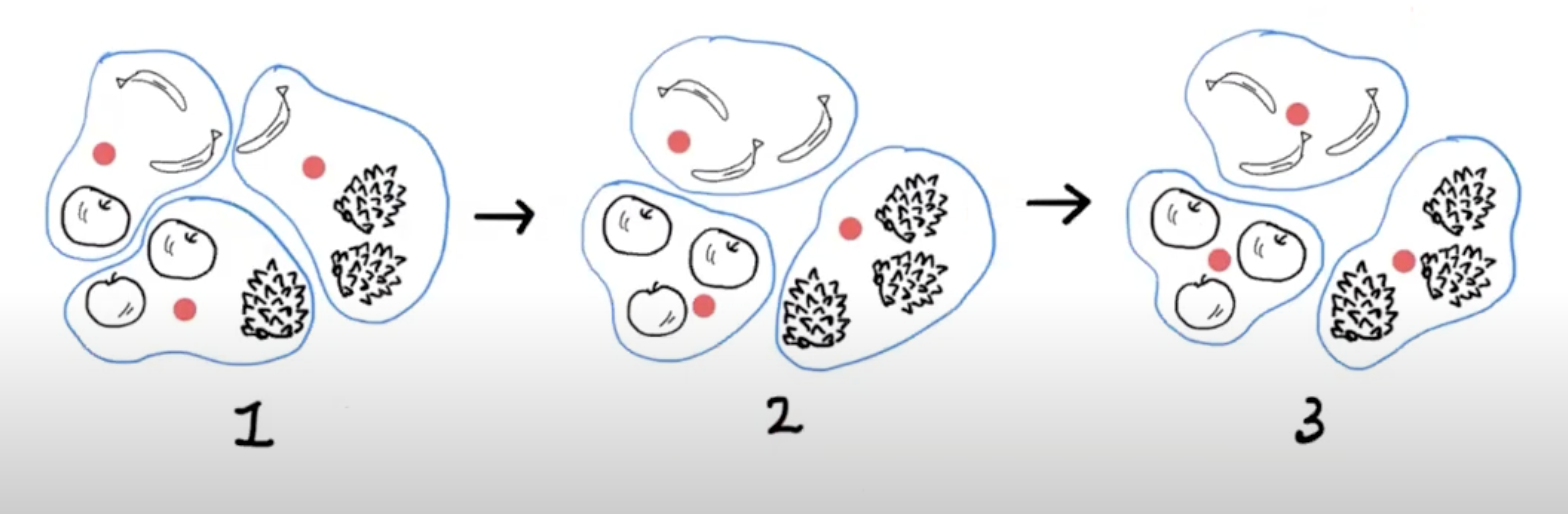

위의 그림을 예로 설명해보자면
- 1  
    >먼저 3개의 클러스터 중심을 랜덤하게 지정한다. 그리고 클러스터 중심에서 가장 가까운 샘플을 하나의 클러스터로 묶는다.  
- 2
    > 클러스터의 중심을 다시 계산(샘플의 평균값)하여 이동시킨 다음 가장 가까운 샘플을 다시 클러스터로 묶는다.   
    > 평균하기 때문에 더 비슷한 샘플이 많은 곳에 값이 가까워 지겠지~?
- 3
    > 다시 한번 클러스터 중심을 계산하여 이동시킨 다음 가장 가까운 샘플을 다시 클러스터로 묶는다.
- END
    > 중심에서 가까운 샘플은 이전 클러스터와 동일하다. 즉, 중심에 변화가 없다. 따라서 알고리즘이 종료된다.

k-평균 알고리즘은 처음에는 랜덤하게 클러스터 중심을 선택하고 점차 가장 가까운 샘플의 중심으로 이동하는 비교적 간단한 알고리즘이다.

In [1]:
# 데이터 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-02-07 14:58:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-07 14:58:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-07 14:58:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
# k평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을 
fruits_2d = fruits.reshape(-1, 100*100) # (샘플 개수, 너비 * 높이) 크기를 가진 2차원 배열로 변경

In [4]:
# 모델 훈련
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d) # 비지도 학습이므로 타깃 데이터를 사용하지 않네~?

KMeans(n_clusters=3, random_state=42)

군집된 결과는 KMeans 객체의 labels_ 속성에 저장된다.  
labels_ 배열의 길이는 샘플 개수와 같다.  
이 배열은 각 샘플이 어떤 레이블에 해당되는지 나타낸다.  
n_clusters=3으로 정했기 때문에 배열의 값은 0, 1, 2중 하나이다.

In [5]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


레이블값 0, 1, 2와 레이블 순서에는 어떤 의미도 없다.  
실제 레이블 0, 1, 2가 어떤 과일 사진을 주로 모았는지 알아보려면 직접 이미지를 출력하는 것이 최선!

In [7]:
# 레이블 0, 1, 2로 모은 샘플의 개수 출력
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 개수
    # 한줄에 10개씩 이미지를 그리기 위해
    rows = int(np.ceil(n/10))
    # 행이 하나면 열의 개수는 행의 개수라서
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap="gray_r")
            axs[i, j].axis('off')
    plt.show()

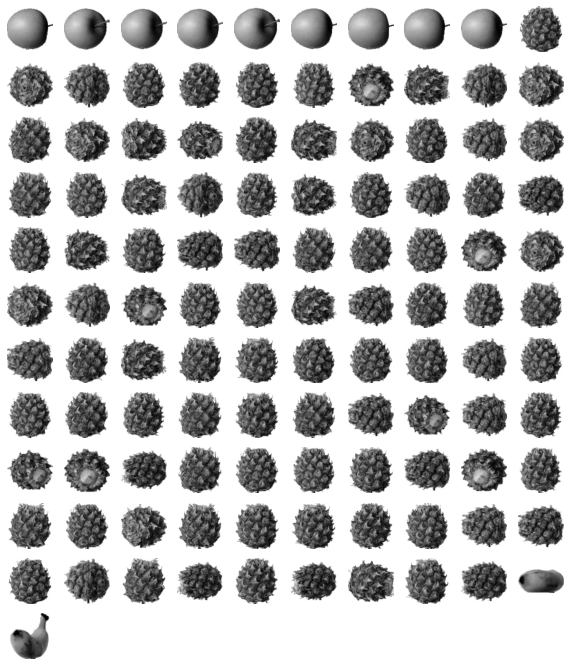

In [10]:
draw_fruits(fruits[km.labels_ == 0]) # 불리언 인덱싱

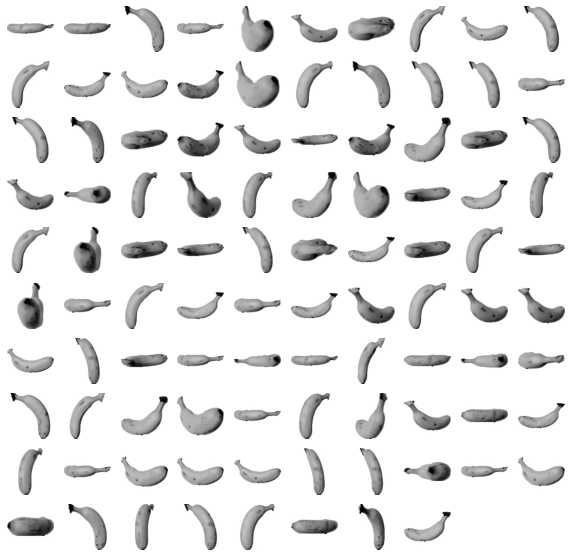

In [11]:
draw_fruits(fruits[km.labels_ == 1])

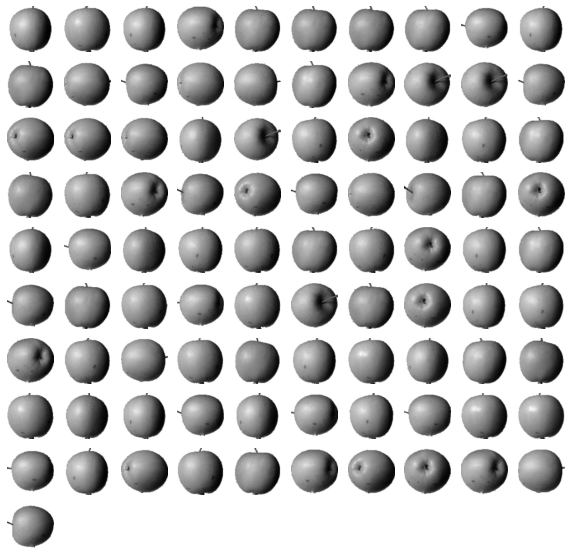

In [12]:
draw_fruits(fruits[km.labels_ == 2])

KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있다.

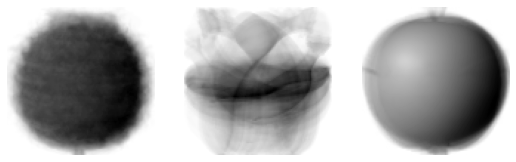

In [13]:
# fruits_2d 샘플의 클러스터 중심이므로 이미지로 출력할떄는 다시 3차원으로 변경
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 trasform() 메서드가 있다.  
trasform() 메서드가 있다는 것은 마치 StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미!

In [14]:
print(km.transform(fruits_2d[100:101])) # 인자로 2차원 배열을 기대하므로 슬라이싱 사용

[[3393.8136117  8837.37750892 5267.70439881]]


0 번째 레이블에 가장 가까우므로 0에 속한 것 같다고 추정할 수 있음.  
KMeans 클래스는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() 메서드를 제공함.

In [15]:
print(km.predict(fruits_2d[100:101]))

[0]


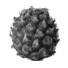

In [16]:
draw_fruits(fruits[100:101])

앞서 말했듯이 k평균 알고리즘은 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾음.  
알고리즘이 반복한 횟수는 KMeans 클래스의 n_iter_ 속성에 저장됨.

In [18]:
print(km.n_iter_)

4


### 여기서 잠깐
n_clusters를 3으로 지정한 것은 타깃에 대한 정보를 활용한 것이다.  
그러나 실전에서는 클러스터 개수조차 알 수 없다. 그렇다면 n_clusters를 어떻게 지정할까?

### 최적의 k 찾기
k평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것이다.  
사실 군집 알고리즘에서 적절한 k 값을 찾기 위한 완벽한 방법은 없다.  
대표적인 방법인 **엘보우 방법**에 대해서 알아보자.
> k평균은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있는데, 이 거리의 제곱 합을 이너셔(inertia)라고 부른다.  
이너셔는 클러스터의 샘플이 얼마나 가깝게 있는지를 나타내는 값이다.  
일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어든다.  
엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다.   

---
클러스터의 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 **꺽이는 지점**이 있다.  
이 지점부터는 클러스터의 개수를 늘려도 클러스터에 잘 밀집된 정도가 **크게 개선되지 않는다.**  
즉 이너셔가 크게 줄어들지 않는다. 이 지점이 마치 팔꿈치 모양이여서 엘보우 방법이다ㅎㅎ


KMeans 클래스는 자동으로 이너셔를 계산해서 inertia_ 속성으로 제공한다.

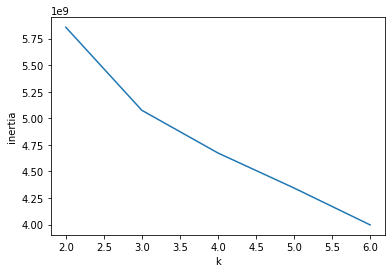

In [21]:
# 이너셔 그래프 그리기
inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

이 그래프에서는 명확하게 꺽이는 지점이 보이지 않지만, k=3에서 그래프의 기울기가 조금 바꿘 것을 확인할 수 있다.  
엘보우 지점보다 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 군집 효과도 줄어든다.